# Posttest KB 6: Deep Neural Network (DNN)

* Import Library yang digunakan

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Preprocessing dataset

* Melihat apakah ada data null atau duplikat

In [4]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
print(data.columns)

# print(data['Sector'].dtype)
print(data['bmi'].dtype)

simpleImputerObjek = SimpleImputer(strategy='mean')
data.loc[:, 'bmi'] = simpleImputerObjek.fit_transform(data[['bmi']])
# data.loc[:, 'Industry'] = simpleImputerObjek.fit_transform(data[['Industry']])

print(data.isnull().sum())


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
float64
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


* Mengubah Nilai Target Dengan Encoding

In [6]:
X = data.drop('stroke', axis=1) 
y = data['stroke']

In [7]:
label = LabelEncoder()
y = label.fit_transform(y)

In [8]:
# Memilih atribut yang dianggap memengaruhi hasil prediksi
selected_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
X = data[selected_features]
y = data['stroke']

* Menerapkan One-Hot Encoding menggunakan get_dummies dari Pandas

In [9]:
try:
    X = pd.get_dummies(X, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
except KeyError as e:
    print("KeyError:", e)
    print("Error Details:", str(e))

KeyError: "None of [Index(['gender', 'ever_married', 'work_type', 'Residence_type',\n       'smoking_status'],\n      dtype='object')] are in the [columns]"
Error Details: "None of [Index(['gender', 'ever_married', 'work_type', 'Residence_type',\n       'smoking_status'],\n      dtype='object')] are in the [columns]"


* Standarisasi

In [12]:
print('Nilai standarisasi sebelum dilakukan scaling: ')
std = data.std(numeric_only=True)
np.std(data)

Nilai standarisasi sebelum dilakukan scaling: 


id                   21159.650905
age                     22.610434
hypertension             0.296578
heart_disease            0.226041
avg_glucose_level       45.279129
bmi                      7.697265
stroke                   0.215299
dtype: float64

In [13]:
standard_scaler = StandardScaler()
x_standard = standard_scaler.fit_transform(
    data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
)

In [14]:
print('Nilai sesudah dilakukan scalling: ')
np.std(x_standard)

Nilai sesudah dilakukan scalling: 


1.0

# Split dataset menjadi train dan test

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)

# Model sequential

In [16]:
model = Sequential([
    Dense(units=64, activation='relu',input_shape=(None,1)), #Output Layer Wajib units
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 64)          128       
                                                                 
 dense_1 (Dense)             (None, None, 32)          2080      
                                                                 
 dense_2 (Dense)             (None, None, 1)           33        
                                                                 
Total params: 2241 (8.75 KB)
Trainable params: 2241 (8.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model Training

__Model Compile__

In [28]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

__Call Back__

* Callback untuk menghentikan pelatihan jika tidak ada perbaikan pada validation loss

In [29]:
stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

* Callback untuk menyimpan model terbaik berdasarkan validation loss

In [30]:
check = ModelCheckpoint('best_model.h5', save_best_only=True)

__Model Fit__

In [31]:
history = model.fit(
    x = x_train,
    y = y_train,
    epochs=50, #50x Pembelajaran
    validation_data = (X, y),
    batch_size=64,
    callbacks=[stop, check]
)

Epoch 1/50
68/68 [==============================] - 3s 12ms/step - loss: 0.1997 - accuracy: 0.9526 - val_loss: 0.1963 - val_accuracy: 0.9513
Epoch 2/50
28/68 [===========>..................] - ETA: 0s - loss: 0.1980 - accuracy: 0.9503

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


68/68 [==============================] - 0s 6ms/step - loss: 0.1902 - accuracy: 0.9535 - val_loss: 0.1991 - val_accuracy: 0.9513
Epoch 3/50
68/68 [==============================] - 0s 6ms/step - loss: 0.1891 - accuracy: 0.9534 - val_loss: 0.1962 - val_accuracy: 0.9513
Epoch 4/50
68/68 [==============================] - 0s 5ms/step - loss: 0.1894 - accuracy: 0.9535 - val_loss: 0.2000 - val_accuracy: 0.9513
Epoch 5/50
68/68 [==============================] - 0s 6ms/step - loss: 0.1898 - accuracy: 0.9535 - val_loss: 0.1960 - val_accuracy: 0.9513
Epoch 6/50
68/68 [==============================] - 0s 6ms/step - loss: 0.1904 - accuracy: 0.9535 - val_loss: 0.1944 - val_accuracy: 0.9513
Epoch 7/50
68/68 [==============================] - 0s 5ms/step - loss: 0.1882 - accuracy: 0.9534 - val_loss: 0.1957 - val_accuracy: 0.9513
Epoch 8/50
68/68 [==============================] - 0s 6ms/step - loss: 0.1919 - accuracy: 0.9528 - val_loss: 0.1932 - val_accuracy: 0.9513
Epoch 9/50
68/68 [=============

In [32]:
# Load model terbaik
model = keras.models.load_model('best_model.h5')

__Evaluasi Model__

In [33]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

24/24 [==============================] - 0s 3ms/step - loss: 0.2297 - accuracy: 0.9387
Test Loss: 0.2297
Test Accuracy: 0.9387


### Grafik perbandingan antara accuracy dan loss dari train dan test

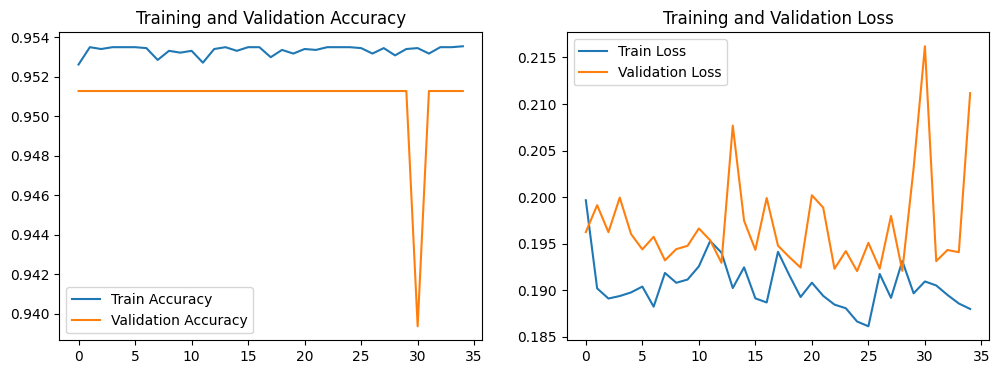

In [34]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()